In [7]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# illustrate fourier transform of different 2D filters

## Start here if working on google collab

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [10]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [11]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap

## Create 2D rectangular pulse

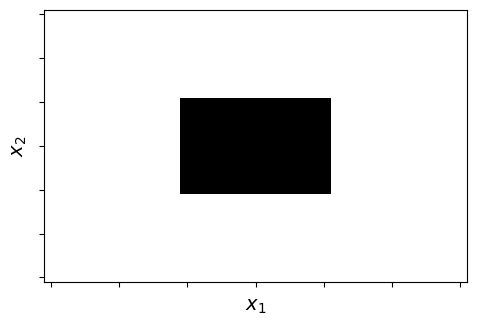

In [13]:
# Size of signals
L = 50
c = np.linspace(0.99, 0.0, 64)
C = np.column_stack((c, c, c))

# Create 2D rectangular pulse
f = np.zeros((L, L))
f[19:30, 19:30] = 1

fig = plt.figure(figsize=(12, 12))

# Create a custom colormap from black to white
cmap = LinearSegmentedColormap.from_list('black_white', [(1, 1, 1), (0.5, 0.5, 0.5), (0, 0, 0)], N=64)

# Plot rectangular pulse
ax1 = fig.add_subplot(3, 2, 1)
ax1.imshow(f[9:40, 9:40], cmap=cmap, aspect='auto')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_ylabel(r'$x_2$', fontsize=14)
ax1.set_xlabel(r'$x_1$', fontsize=14)

plt.show()


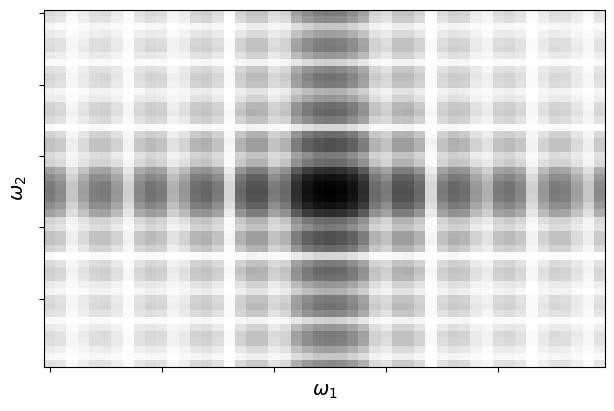

In [14]:
# Perform Fourier transform and rescale for visibility
m = np.log(1 + np.abs(fft2(f)))
mf = fftshift(m)

fig = plt.figure(figsize=(12, 12))

# Create a custom colormap from black to white
cmap = LinearSegmentedColormap.from_list('black_white', [(1, 1, 1), (0.5, 0.5, 0.5), (0, 0, 0)], N=64)

# Plot the Fourier transform of the Gaussian filter
ax = fig.add_subplot(3, 2, 3)
im = ax.imshow(mf, cmap=cmap, aspect='auto')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel(r'$\omega_2$', fontsize=14)
ax.set_xlabel(r'$\omega_1$', fontsize=14)

plt.tight_layout()
plt.show()


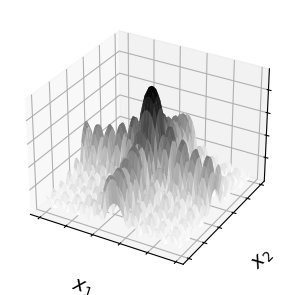

In [15]:
fig = plt.figure(figsize=(12, 12))

# Plot the 3D mesh of the Fourier transform
ax = fig.add_subplot(3, 2, 5, projection='3d')
X, Y = np.meshgrid(np.arange(mf.shape[0]), np.arange(mf.shape[1]))
ax.plot_surface(X, Y, mf, cmap=cmap)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_zlabel(r'$|\hat{f}(\omega_1,\omega_2)|$', fontsize=14, labelpad=20)
plt.show()

## Create 2D Gaussian filter

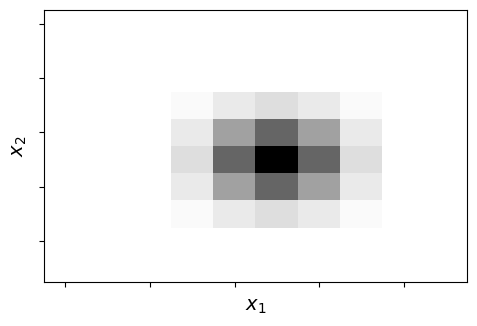

In [16]:
# Define parameters
L = 50
sigma = 1
c = np.linspace(0.99, 0.0, 64)
C = np.column_stack((c, c, c))

# Create 2D Gaussian filter
f = np.zeros((L, L))
f[L//2, L//2] = 1  # Set the center to 1
f = gaussian_filter(f, sigma=sigma)

# Plot the Gaussian filter
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(3, 2, 2)
ax.imshow(f[20:30, 20:30], cmap=cmap, aspect='auto')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_xlabel(r'$x_1$', fontsize=14)
plt.show()

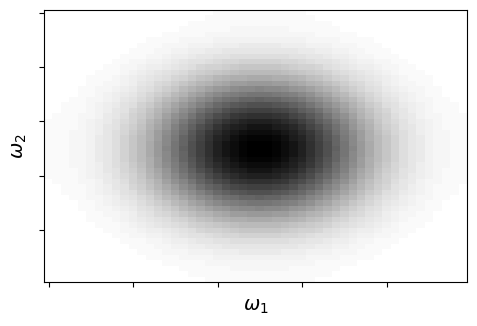

In [17]:
# Perform Fourier transform and rescale for visibility
m = np.log(1 + np.abs(fft2(f)))
mf = fftshift(m)

fig = plt.figure(figsize=(12, 12))

# Create a custom colormap from black to white
cmap = LinearSegmentedColormap.from_list('black_white', [(1, 1, 1), (0.5, 0.5, 0.5), (0, 0, 0)], N=64)

# Plot the Fourier transform of the Gaussian filter
ax = fig.add_subplot(3, 2, 4)
im = ax.imshow(mf, cmap=cmap, aspect='auto')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel(r'$\omega_2$', fontsize=14)
ax.set_xlabel(r'$\omega_1$', fontsize=14)

plt.show()


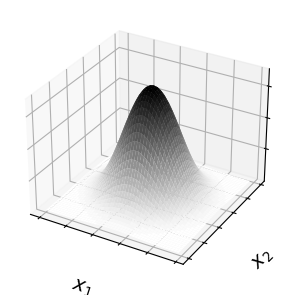

In [18]:
# Plot the 3D mesh of the Fourier transform
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(3, 2, 6, projection='3d')
X, Y = np.meshgrid(np.arange(mf.shape[0]), np.arange(mf.shape[1]))
ax.plot_surface(X, Y, mf, cmap=cmap)

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_ylabel(r'$x_2$', fontsize=14)
ax.set_xlabel(r'$x_1$', fontsize=14)
ax.set_zlabel(r'$|\hat{f}(\omega_1,\omega_2)|$', fontsize=14, labelpad=10)
plt.show()